# generate word clouds to see frequent words/topics to determine stop words

In [1]:
import nltk
import json
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud
from collections import defaultdict
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

In [2]:
tokenizer = RegexpTokenizer(r'\w+')

In [3]:
stop_words = set(stopwords.words('english'))

# words used in the filter
filterWords = {"tesla", "elon", "musk", "elonmusk", "tsla", "roadster", "supercharger", "powerwall", "powerpack", "modely",
               "model3", "modelx", "teslamodely", "teslamodels", "teslamodel3", "teslamodelx", "spacex",
               "teslasuv", "teslascience"}

# bigrams used in the filter
filterBigrams = {("model", "y"), ("model", "s"), ("model", "3"), ("model", "x"), ("electric", "vehicle"),
                 ("electric", "car"), ("electric", "suv"), ("electric", "supercar")}

# stop words found using the word cloud (manual extraction)
cloud = {'year', 'amp', 'us'}

# add filter words to the stop words
for word in filterWords:
    stop_words.add(word)
    
# add filter bigrams to the stop words
for bi1, bi2 in filterBigrams:
    stop_words.add(bi1)
    stop_words.add(bi2)
    
# add cloud to the stop words
for word in cloud:
    stop_words.add(word)

counts = defaultdict(int)

handle = open('../classify_rel_labeled.json', encoding='utf8')

for line in handle:
    item = json.loads(line)
    if item['isRelevant'] == 1:  # get relevant tweets
        tokens = tokenizer.tokenize(item['text'].lower())
        for token in tokens:
            if token not in stop_words:
                counts[token] += 1
        
handle.close()

In [4]:
wc = WordCloud(background_color="white", max_words=100, width=1000, height=500)
wc.generate_from_frequencies(counts)

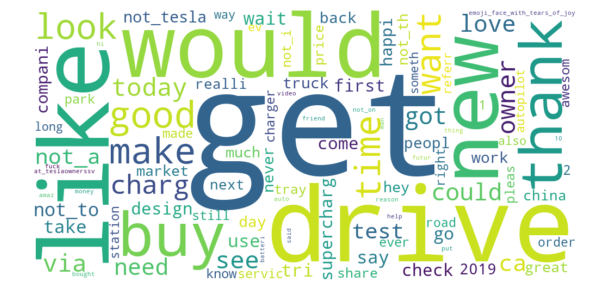

In [5]:
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [6]:
# print the most common words
counts2 = []
for i, j in counts.items():
    counts2.append((i,j))
counts2.sort(key=lambda x:x[1], reverse=True)
for i in counts2:
    print(i)

('get', 240)
('drive', 180)
('like', 153)
('would', 138)
('new', 120)
('buy', 108)
('thank', 102)
('good', 99)
('make', 96)
('time', 93)
('look', 90)
('want', 90)
('charg', 81)
('today', 81)
('owner', 81)
('via', 78)
('see', 78)
('could', 75)
('got', 75)
('love', 72)
('ca', 72)
('need', 69)
('not_a', 69)
('test', 69)
('not_to', 69)
('use', 66)
('take', 66)
('wait', 66)
('tri', 66)
('say', 66)
('go', 63)
('come', 60)
('check', 60)
('design', 60)
('first', 60)
('supercharg', 60)
('happi', 57)
('compani', 57)
('not_tesla', 57)
('work', 54)
('day', 54)
('never', 54)
('truck', 54)
('peopl', 54)
('back', 54)
('2019', 54)
('great', 51)
('market', 51)
('much', 51)
('hey', 51)
('realli', 48)
('china', 48)
('next', 48)
('not_th', 48)
('share', 45)
('tray', 45)
('awesom', 45)
('2', 45)
('price', 45)
('charger', 42)
('park', 42)
('ever', 42)
('know', 42)
('still', 42)
('pleas', 42)
('servic', 42)
('made', 42)
('1', 42)
('not_i', 42)
('order', 39)
('right', 39)
('station', 39)
('road', 39)
('way', 

('20mpg', 3)
('not_video', 3)
('not_emma', 3)
('not_tour', 3)
('not_but', 3)
('not_subaru', 3)
('not_with', 3)
('not_pap', 3)
('not_symbol', 3)
('not_top', 3)
('not_gath', 3)
('not_photo', 3)
('spirit', 3)
('electrifi', 3)
('challengecoin', 3)
('polish', 3)
('fundingsecur', 3)
('emoji_folded_hand', 3)
('ceil', 3)
('costlier', 3)
('ipadpro', 3)
('imovi', 3)
('edit', 3)
('cam', 3)
('speedventur', 3)
('initi', 3)
('drew', 3)
('girlfriend', 3)
('lotto', 3)
('hardest', 3)
('pitch', 3)
('hello', 3)
('gerogia', 3)
('bullish', 3)
('move', 3)
('debat', 3)
('i8', 3)
('roaster', 3)
('heck', 3)
('enhanc', 3)
('murcielago', 3)
('empir', 3)
('asap', 3)
('lambo', 3)
('remodel', 3)
('produxa', 3)
('alpharetta', 3)
('clever', 3)
('manipul', 3)
('headlin', 3)
('sharehold', 3)
('vote', 3)
('onl', 3)
('hmmm', 3)
('stage', 3)
('dank', 3)
('ensu', 3)
('ton', 3)
('monney', 3)
('skeptic', 3)
('captur', 3)
('environ', 3)
('vossenwheel', 3)
('automotivephotographi', 3)
('newprofilep', 3)
('resembl', 3)
('emoji_

# look at common words in irrelevant tweets

In [7]:
irr = defaultdict(int)

handle = open('../classify_rel_labeled.json', encoding='utf8')

for line in handle:
    item = json.loads(line)
    if item['isRelevant'] == 0:  # irrelevant tweets
        tokens = tokenizer.tokenize(item['text'].lower())
        for token in tokens:
            if token not in stop_words:
                irr[token] += 1
        
handle.close()

In [8]:
wc = WordCloud(background_color="white", max_words=100, width=1000, height=500)
wc.generate_from_frequencies(irr)

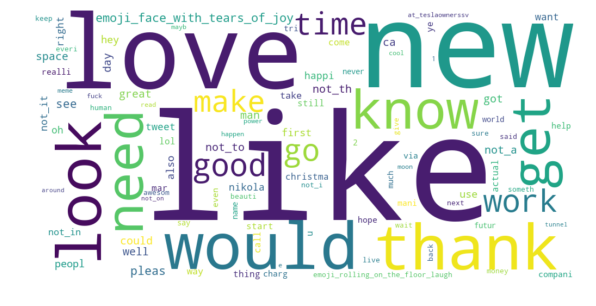

In [9]:
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

# look at common words in negative tweets

In [19]:
neg = defaultdict(int)

# remove stop words
stop_words = {'elonmusk', 'tesla', 'get', 'at_tesla', 'at_elonmusk'}

handle = open('../classify_rel_labeled.json', encoding='utf8')

for line in handle:
    item = json.loads(line)
    if item['isRelevant'] == 1 and item['sentiment'] == 0:  # get relevant tweets
        tokens = tokenizer.tokenize(item['text'].lower())
        for token in tokens:
            if token not in stop_words:
                neg[token] += 1
handle.close()

In [20]:
wc = WordCloud(background_color="white", max_words=100, width=1000, height=500)
wc.generate_from_frequencies(neg)

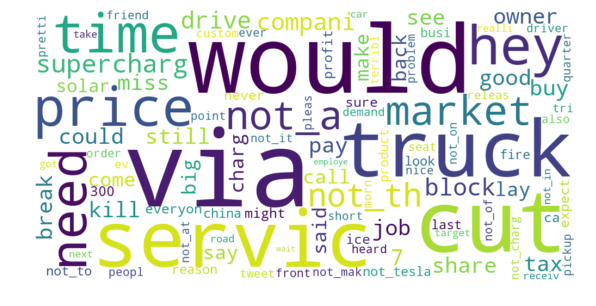

In [21]:
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

# look at positive words in tweets

In [22]:
pos = defaultdict(int)

handle = open('../classify_rel_labeled.json', encoding='utf8')

for line in handle:
    item = json.loads(line)
    if item['isRelevant'] == 1 and item['sentiment'] == 2:  # get relevant tweets
        tokens = tokenizer.tokenize(item['text'].lower())
        for token in tokens:
            if token not in stop_words:
                pos[token] += 1
handle.close()

In [23]:
wc = WordCloud(background_color="white", max_words=100, width=1000, height=500)
wc.generate_from_frequencies(pos)

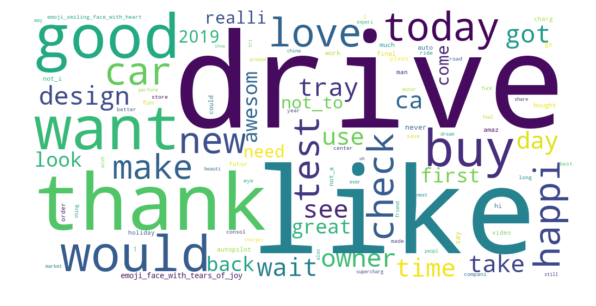

In [24]:
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()